In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,export_text

from sklearn import metrics
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("C:/Users/Juned/Downloads/Rtest/demo.csv")
data

,Sr. No,Timestamp,Email address,Your Name,City,"Current Qualification (please be specific here) For eg : (B.Com, B.Sc C.S, B.Tech)",In which field would you like to pursue your career in the future?,I understand and agree that the information provided above is correct and I'm willing to do career guidance and counselling session for me / my child.,I like to work on cars,I like to build things,...,I like to do filing or typing,I am good at keeping records of my work,I would like to work in an office,R,I,A,S,E,C,class
0,7,06-04-2022 12:05,aakash.patel1@gmail.com,Aakash,Ahmedabad,Bachelor of engineering,Big data,I agree,yes,yes,...,no,no,yes,5,5,3,6,3,4,S
1,111,20-04-2022 12:10,ystwuw@gmail.com,Yash patel,Ahmedabad,b.tech,M.tech,I agree,yes,yes,...,yes,yes,yes,7,7,7,7,7,7,any
2,13,06-04-2022 14:02,satwiknakhate2000@gmail.com,Satwik,Ambajogai,Btech,Computer science,I agree,no,no,...,no,no,no,1,4,7,4,2,0,A
3,80,15-04-2022 22:54,siddhant.dixit212@gmail.com,Avinash Kale,Ambajogai,MBBS,Doctor,I agree,no,no,...,no,yes,no,4,5,1,4,1,5,I
4,81,15-04-2022 22:57,siddhant.dixit212@gmail.com,Soham Yadav,Ambajogai,B.tech,Software Engineer,I agree,no,no,...,yes,no,yes,1,6,1,6,4,6,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,94,20-04-2022 11:25,meghathorat245@gmail.com,Megha Thorat,Raigad,Masters in Media and Journalism,Journalism,I agree,no,yes,...,yes,yes,no,6,5,7,7,7,5,A
136,122,20-04-2022 13:35,nehamp1999@gmail.com,Neha Mujib Pathan,Sillod,BSc,Statistics,I agree,yes,yes,...,no,yes,no,6,7,5,6,5,3,I
137,108,20-04-2022 12:08,ameympatil@gmai.com,Amey Patil,Thane,BSc IT,Data Science,I agree,yes,yes,...,yes,yes,yes,5,7,0,5,4,7,I
138,17,06-04-2022 18:13,viramgamabhakti30@gmail.com,Bhakti Viramgama,Vadodara,BHMS,Bhms,I agree,no,yes,...,yes,yes,yes,4,6,5,7,6,7,S


In [3]:
data.shape

(140, 57)

In [4]:
data.describe()

,Sr. No,R,I,A,S,E,C
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,70.5000,5.192857,5.300000,4.371429,5.828571,4.778571,5.442857
std,40.5586,1.521531,1.616907,1.924260,1.454058,1.843003,1.693285
min,1.0000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,35.7500,4.000000,4.000000,3.000000,5.000000,3.750000,4.000000
50%,70.5000,5.000000,6.000000,5.000000,6.000000,5.000000,6.000000
75%,105.2500,6.000000,7.000000,6.000000,7.000000,6.000000,7.000000
max,140.0000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 57 columns):
 #   Column                                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                                  --------------  ----- 
 0   Sr. No                                                                                                                                                  140 non-null    int64 
 1   Timestamp                                                                                                                                               140 non-null    object
 2   Email address                                                                                                                                           140 non-null    ob

In [6]:
data.columns

Index(['Sr. No', 'Timestamp', 'Email address', 'Your Name', 'City',
       'Current Qualification (please be specific here) For eg : (B.Com, B.Sc C.S, B.Tech)',
       'In which field would you like to pursue your career in the future?',
       'I understand and agree that the information provided above is correct and I'm willing to do career guidance and counselling session for me / my child.',
       'I like to work on cars', 'I like to build things',
       'I like to take care of animals',
       'I like putting things together or assembling things', 'I like to cook',
       'I am a practical person', 'I like working outdoors',
       'I like to do puzzles', 'I like to do experiments', 'I enjoy science',
       'I enjoy trying to figure out how things work',
       'I like to analyze things (problems/situations)',
       'I like working with numbers or charts', 'I’m good at math',
       'I am good at working independently',
       'I like to read about art and music', 'I enjoy cre

In [7]:
data.isnull().sum()

Sr. No                                                                                                                                                    0
Timestamp                                                                                                                                                 0
Email address                                                                                                                                             0
Your Name                                                                                                                                                 0
City                                                                                                                                                      0
Current Qualification (please be specific here) For eg : (B.Com, B.Sc C.S, B.Tech)                                                                        0
In which field would you like to pursue your career in the futur

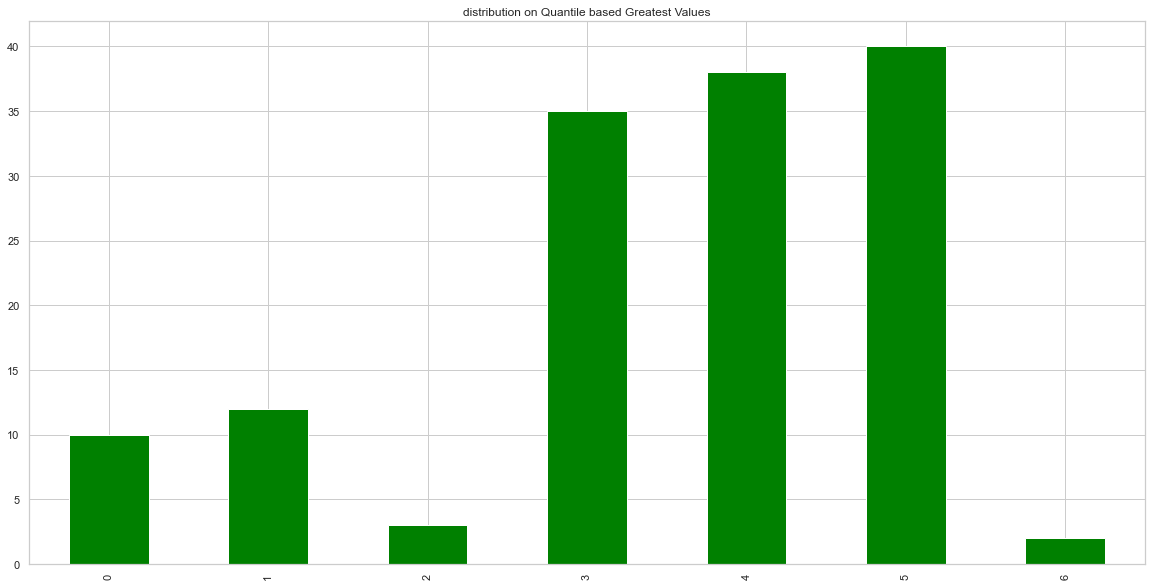

In [56]:
data['class'].value_counts().sort_index().plot(kind='bar',figsize=(20,10),title = "distribution on Quantile based Greatest Values",color='green');

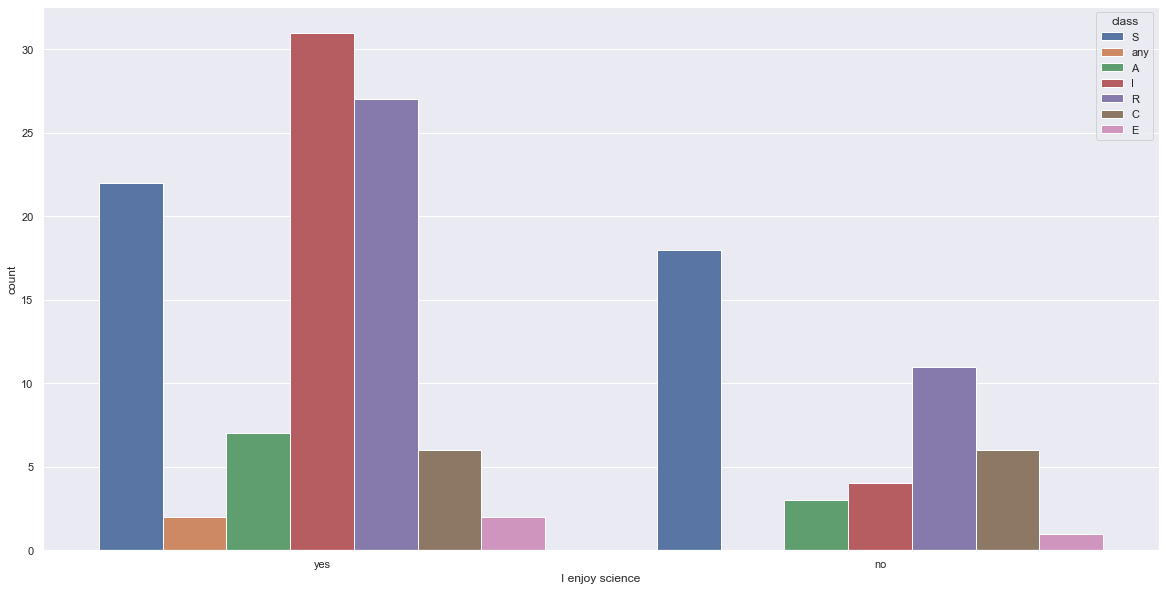

In [9]:
x = data['I enjoy science']
sns.set(rc = {'figure.figsize':(20,10)})
ax = sns.countplot(x=x, hue=data['class'], data=data)

C:\Users\Juned\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R', ylabel='count'>

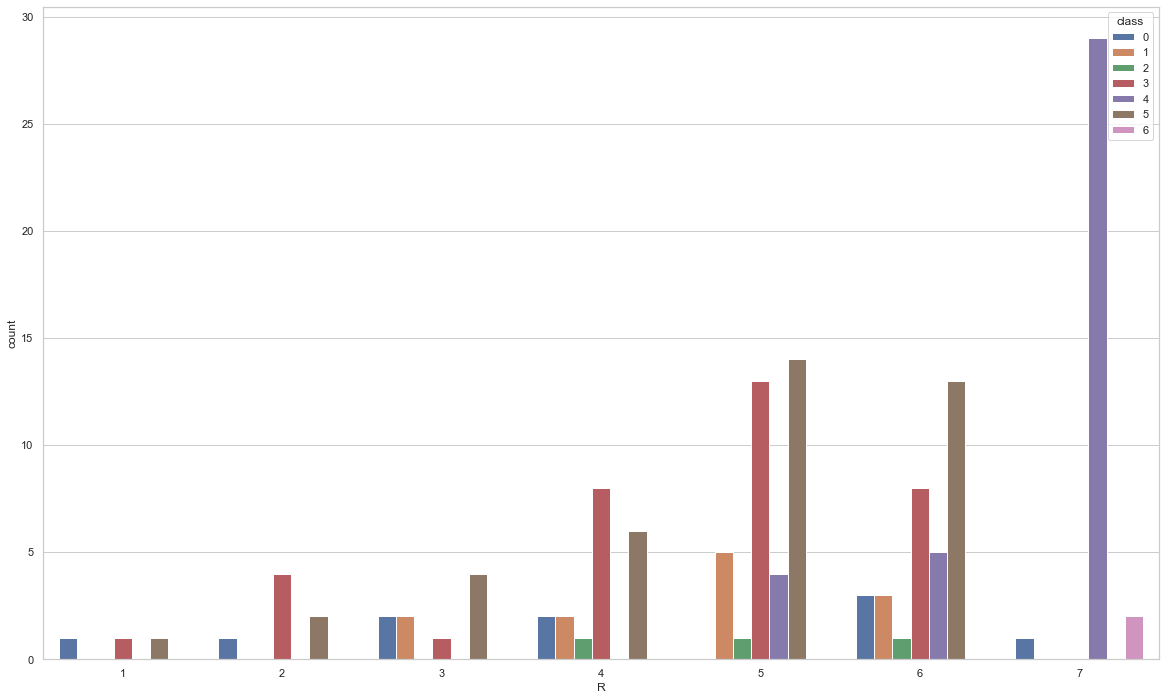

In [58]:
sns.countplot(data['R'],hue=data['class'])

C:\Users\Juned\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='I', ylabel='count'>

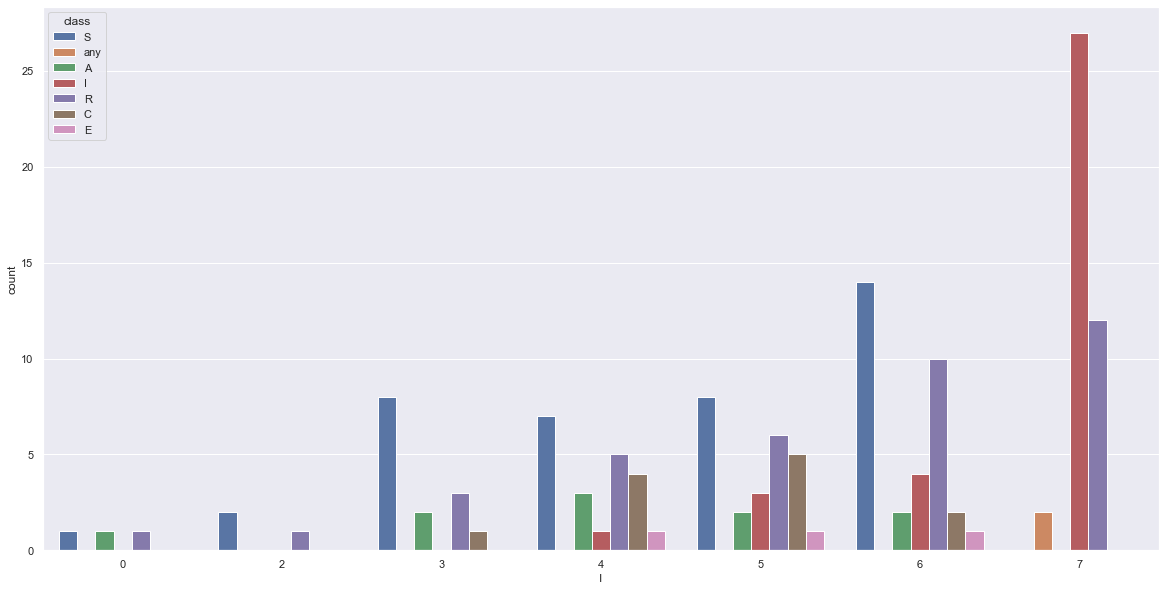

In [11]:
sns.countplot(data['I'],hue=data['class'])

C:\Users\Juned\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='A', ylabel='count'>

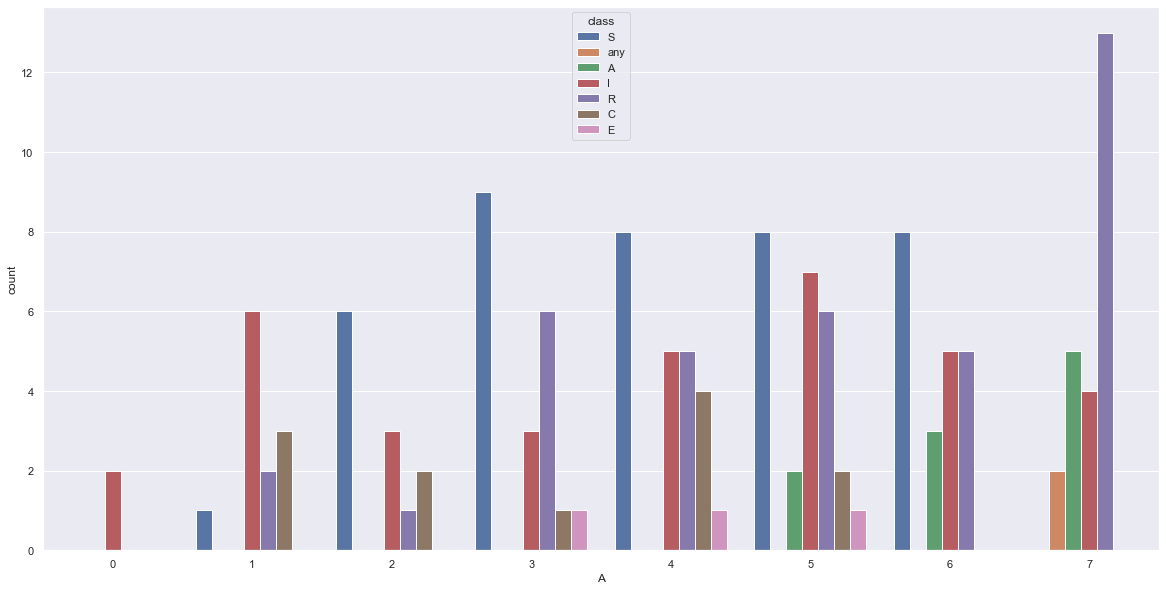

In [12]:
sns.countplot(data['A'],hue=data['class'])

C:\Users\Juned\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='S', ylabel='count'>

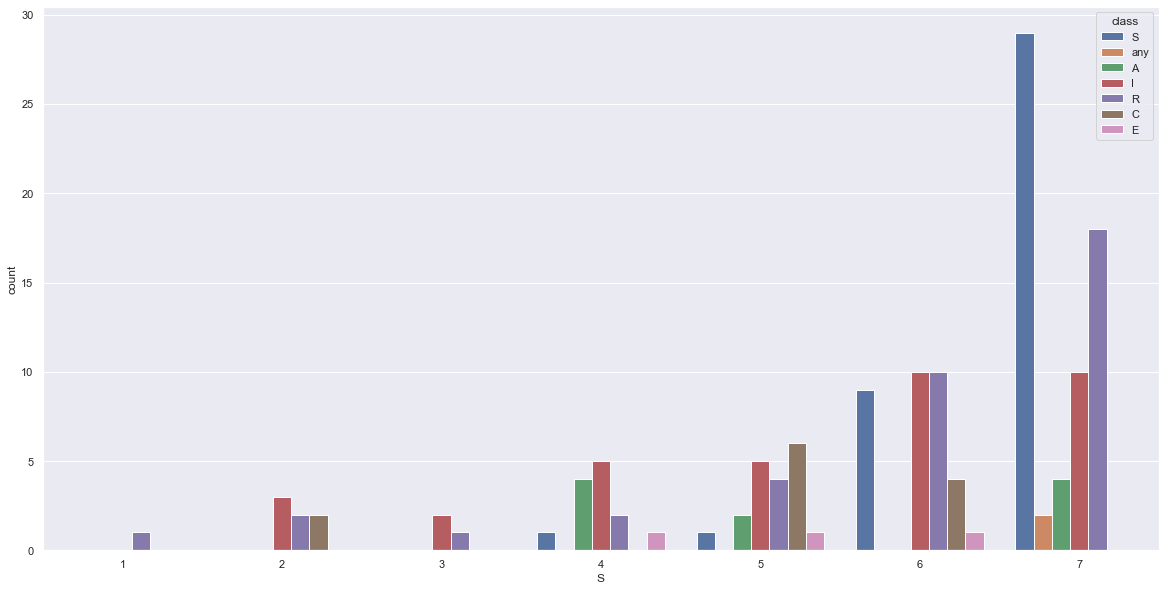

In [13]:
sns.countplot(data['S'],hue=data['class'])

C:\Users\Juned\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='E', ylabel='count'>

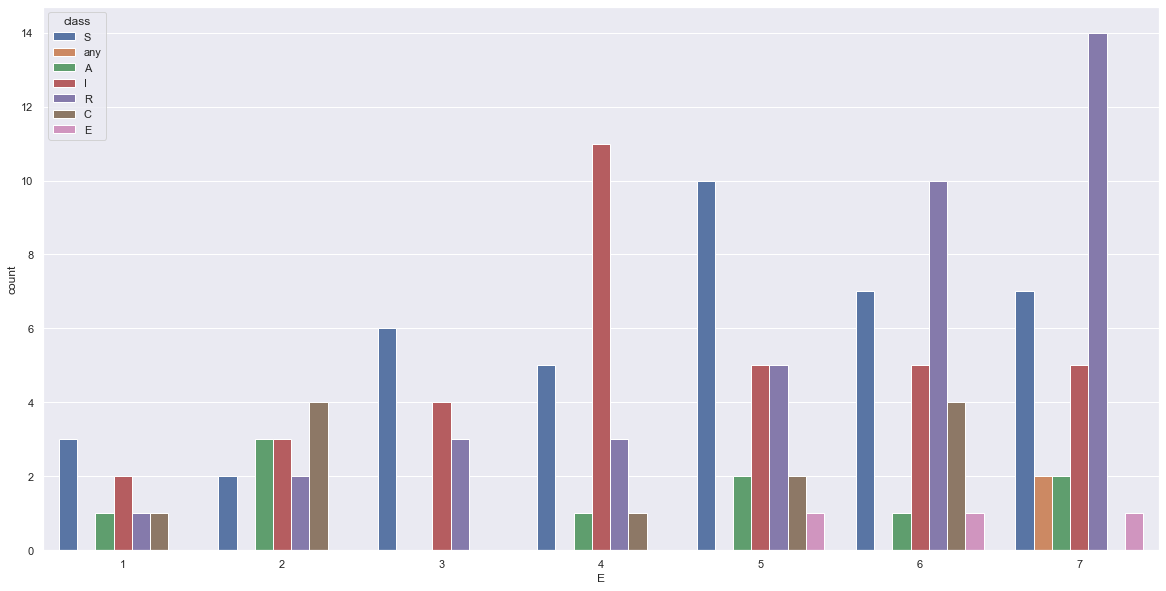

In [14]:
sns.countplot(data['E'],hue=data['class'])

C:\Users\Juned\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='C', ylabel='count'>

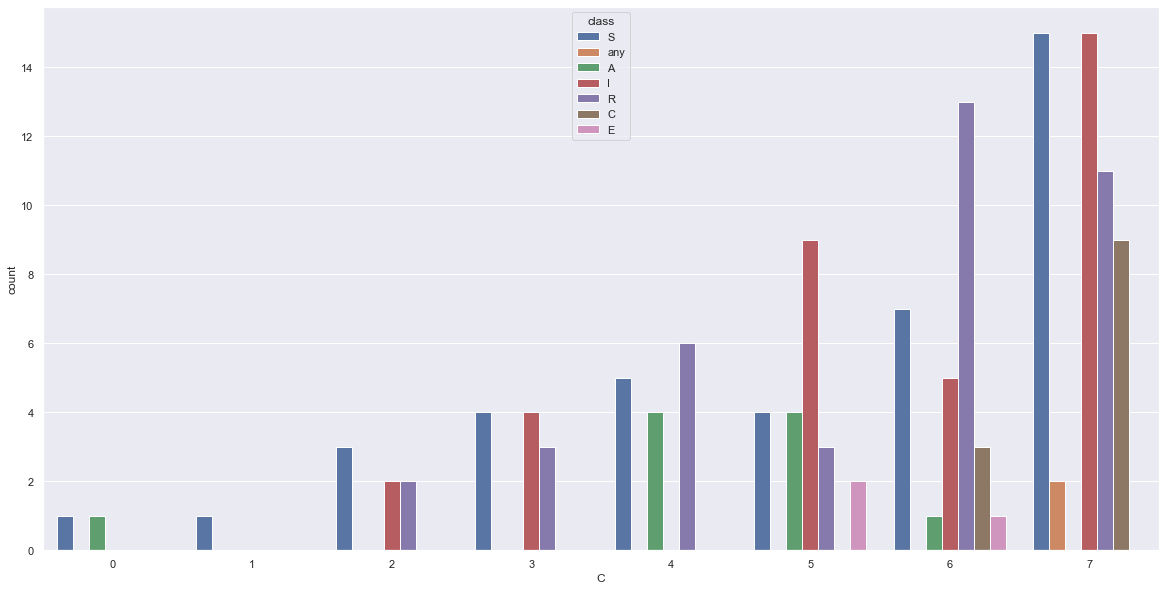

In [15]:
sns.countplot(data['C'],hue=data['class'])

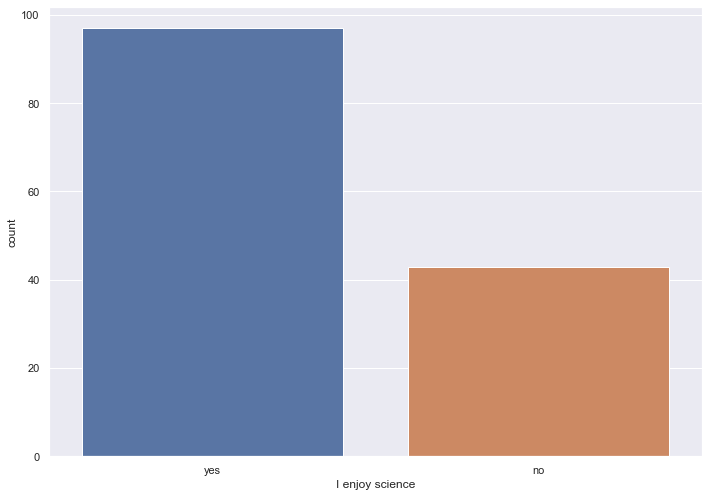

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x=data['I enjoy science'])

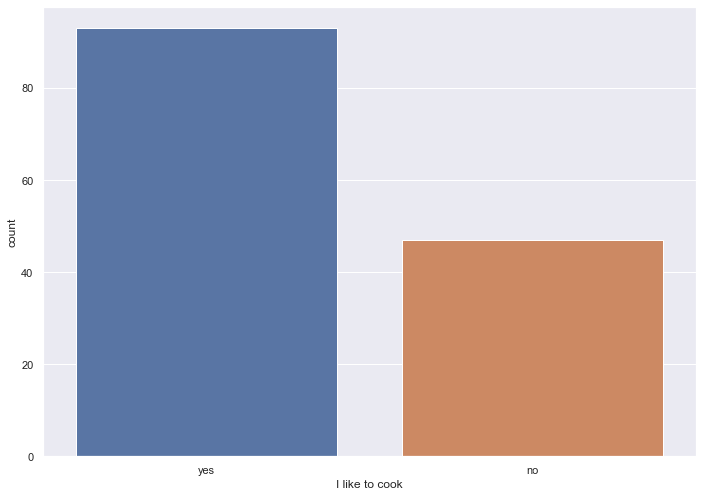

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x=data['I like to cook'])

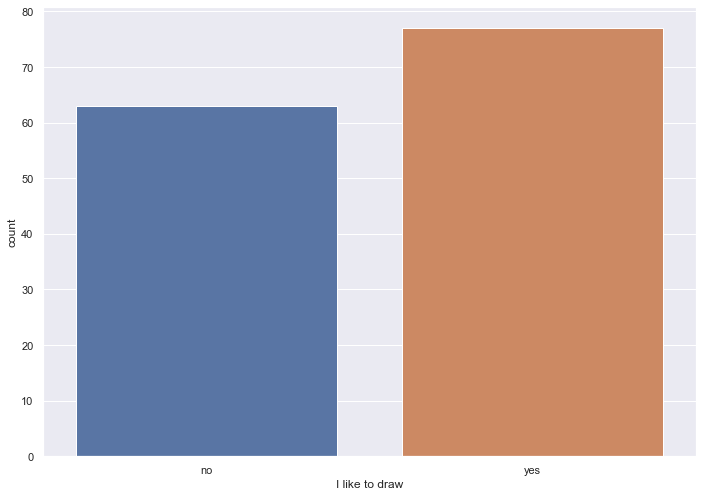

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x=data['I like to draw'])

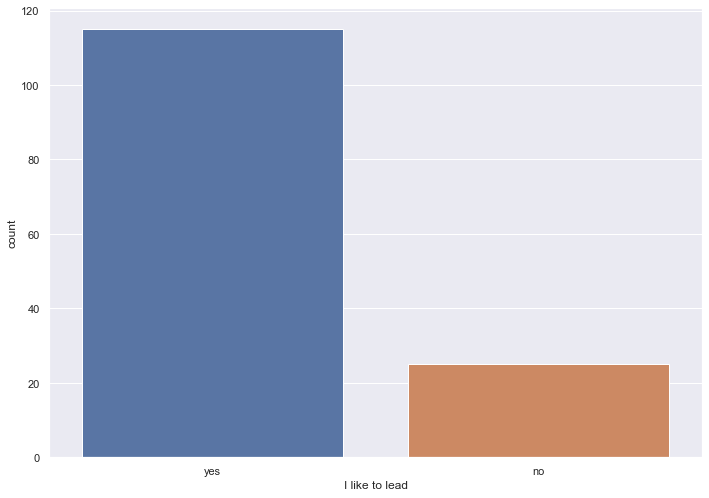

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x=data['I like to lead'])

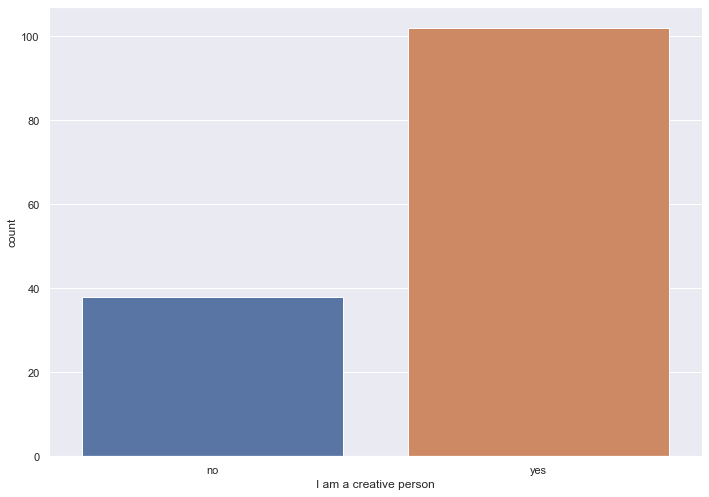

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x=data['I am a creative person'])

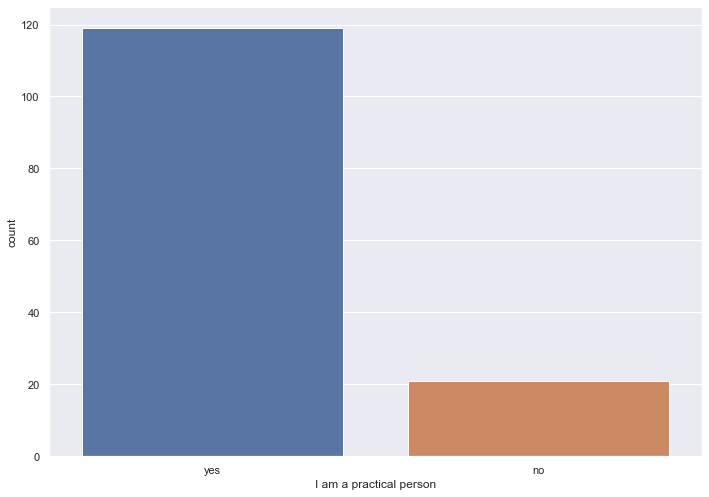

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x=data['I am a practical person'])

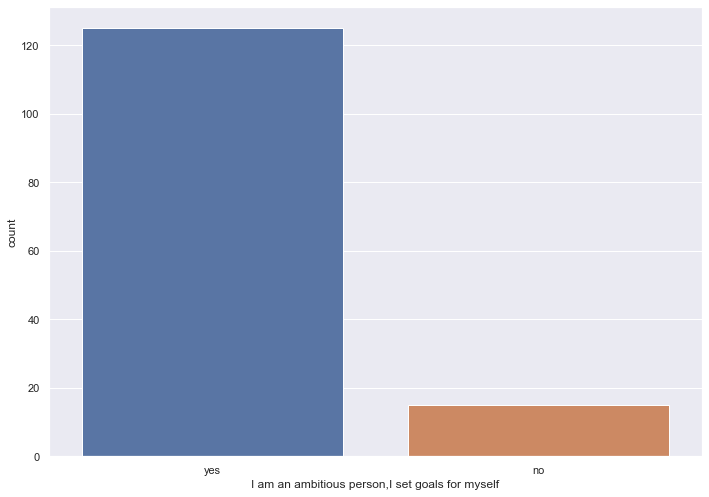

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x=data['I am an ambitious person,I set goals for myself'])

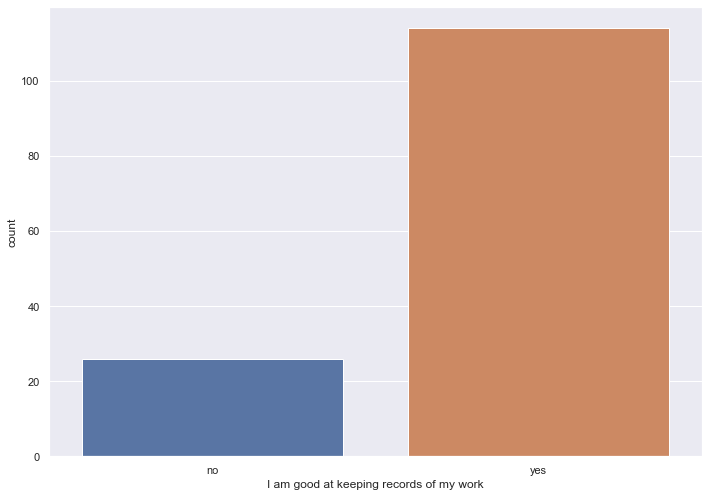

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x=data['I am good at keeping records of my work'])

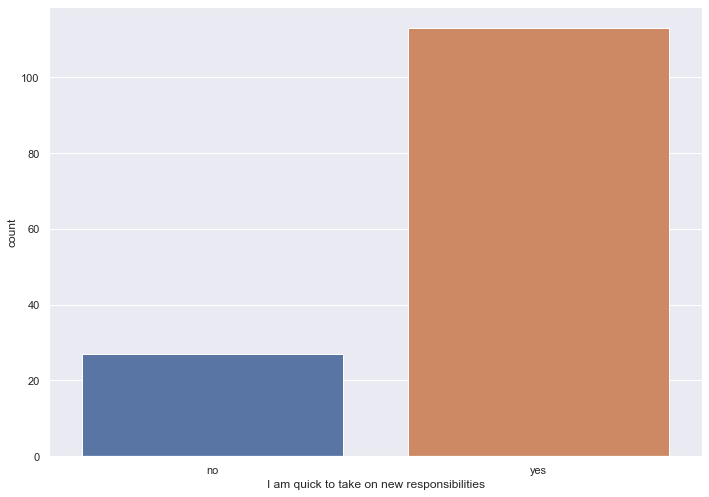

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x=data['I am quick to take on new responsibilities'])

In [25]:
corr=data.corr()
corr

,Sr. No,R,I,A,S,E,C
Sr. No,1.000000,0.085511,0.062201,-0.096236,0.111010,0.100335,0.093231
R,0.085511,1.000000,0.341849,0.314452,0.402014,0.531011,0.251434
I,0.062201,0.341849,1.000000,0.100352,0.282130,0.316985,0.305860
A,-0.096236,0.314452,0.100352,1.000000,0.244046,0.356048,0.152286
S,0.111010,0.402014,0.282130,0.244046,1.000000,0.479697,0.261890
E,0.100335,0.531011,0.316985,0.356048,0.479697,1.000000,0.312896
C,0.093231,0.251434,0.305860,0.152286,0.261890,0.312896,1.000000


<AxesSubplot:>

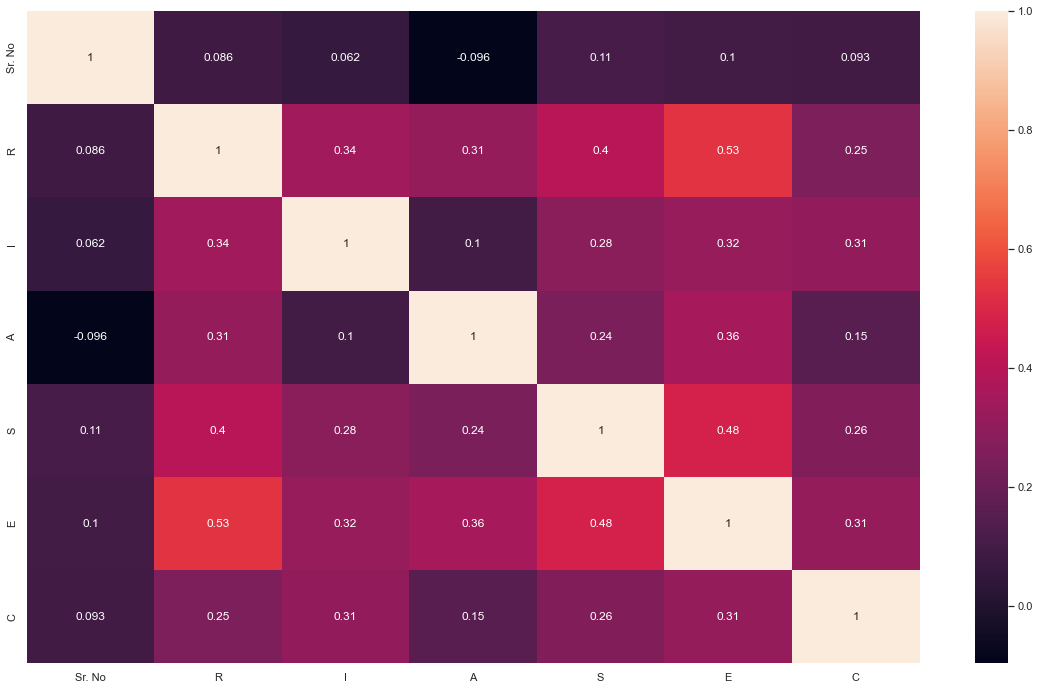

In [26]:
sns.set(rc={'figure.figsize':(20,12)})
sns.set(style='whitegrid')
sns.heatmap(corr,annot=True)

In [27]:
#creating a function to return days quantiles
def return_bins(val):
    if val < 1:
        return "poor"
    elif val < 2:
        return "good"
    elif val < 3:
        return "very good"
    elif val < 4:
        return "better"
    elif val < 5:
        return "best"
    elif val < 6:
        return "excellent"
    else:
        return "choose"

In [28]:
plot_data=pd.concat([data['R'].map(return_bins).value_counts(),
          data['I'].map(return_bins).value_counts(),
          data['A'].map(return_bins).value_counts(),data['S'].map(return_bins).value_counts(),data['E'].map(return_bins).value_counts(),data['C'].map(return_bins).value_counts()],axis=1)

<AxesSubplot:>

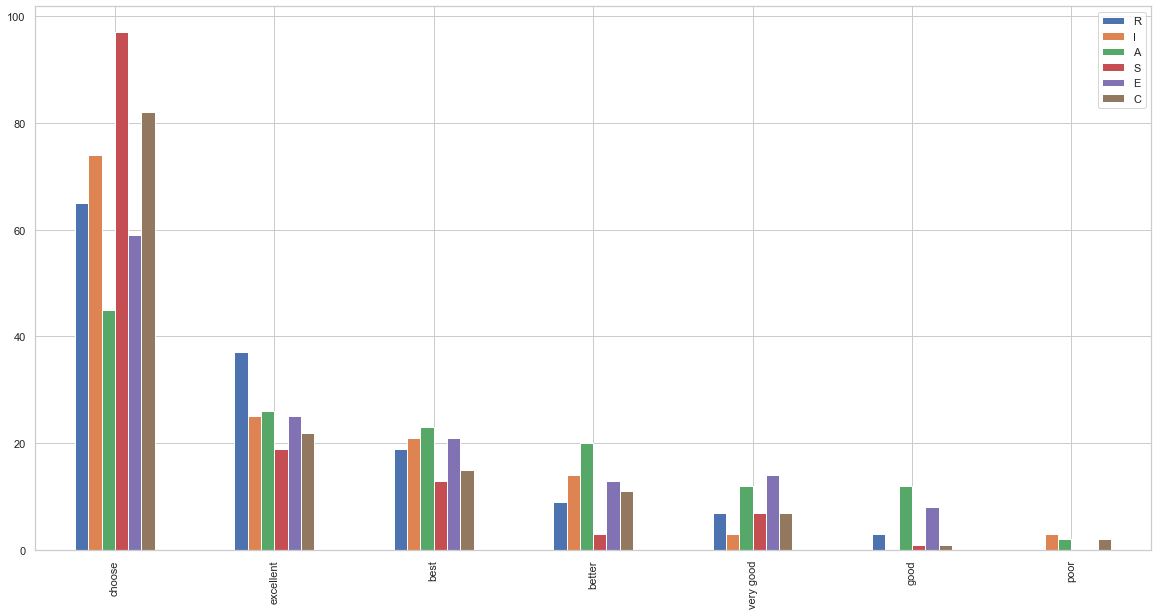

In [29]:
plot_data.plot(kind='bar',figsize=(20,10))

In [30]:
df=data[['R','I',
      'A','S','E','C','class']]

In [31]:
df

,R,I,A,S,E,C,class
0,5,5,3,6,3,4,S
1,7,7,7,7,7,7,any
2,1,4,7,4,2,0,A
3,4,5,1,4,1,5,I
4,1,6,1,6,4,6,I
...,...,...,...,...,...,...,...
135,6,5,7,7,7,5,A
136,6,7,5,6,5,3,I
137,5,7,0,5,4,7,I
138,4,6,5,7,6,7,S


In [32]:
print("unique points: {}".format(len(df['class'].unique())))

unique points: 7


In [33]:
def preprocess(df):
    df = df.copy()

    #split into target variable y and dependent variables x
    Y = df['class']
    X = df[['R','I','A','S','E','C']]

    #train test split
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size=0.7, shuffle=True, random_state=42)

    #scaling the dependent variables X
    scaler = StandardScaler()
    scaler.fit(Xtrain)
    Xtrain = pd.DataFrame(scaler.transform(Xtrain),index=Xtrain.index,columns=Xtrain.columns)
    Xtest = pd.DataFrame(scaler.transform(Xtest),index=Xtest.index,columns=Xtest.columns)

    return Xtrain, Xtest, Ytrain, Ytest

In [34]:
Xtrain, Xtest, Ytrain, Ytest = preprocess(df)
display(Xtrain, Ytrain, Xtest)

,R,I,A,S,E,C
40,0.472476,1.038718,0.750542,0.167020,0.641500,-0.304348
24,1.163560,0.410358,1.272195,0.821737,1.165392,0.913043
93,0.472476,-0.218002,-1.857724,0.167020,0.641500,0.913043
126,-0.218608,0.410358,-0.814418,0.821737,0.117608,0.913043
112,-0.909692,-0.846363,-0.814418,0.821737,1.165392,0.304348
...,...,...,...,...,...,...
71,-0.218608,-0.846363,-0.292764,-1.142414,-0.406284,-0.913043
106,-0.218608,0.410358,-1.857724,-1.797131,0.641500,-1.521739
14,0.472476,-0.846363,1.272195,-0.487697,0.641500,0.304348
92,0.472476,-0.218002,0.228889,0.167020,0.641500,0.913043


40     I
24     R
93     C
126    S
112    S
      ..
71     R
106    I
14     R
92     C
102    R
Name: class, Length: 98, dtype: object

,R,I,A,S,E,C
108,-1.600776,-0.846363,-0.292764,0.167020,-0.930175,-2.130435
67,1.163560,-0.218002,1.272195,0.821737,0.117608,-0.304348
31,0.472476,-0.218002,0.228889,0.821737,0.641500,-0.913043
119,1.163560,1.038718,-0.814418,0.167020,1.165392,-0.913043
42,0.472476,-1.474723,0.750542,0.821737,0.117608,0.913043
12,1.163560,0.410358,-1.336071,0.167020,0.117608,0.913043
81,-0.909692,-1.474723,-1.336071,0.167020,-1.977959,-3.347826
69,-0.218608,-0.846363,-0.814418,0.821737,1.165392,-1.521739
104,0.472476,0.410358,0.228889,0.821737,0.641500,0.913043
109,-0.218608,-1.474723,-1.857724,-1.142414,-0.930175,-2.130435


In [35]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(Xtrain, Ytrain)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.


C:\Users\Juned\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [36]:
for name, model in models.items():
    print (name + ": {:.5f}".format(model.score(Xtest,Ytest)))

                   Logistic Regression: 0.95238
                   K-Nearest Neighbors: 0.66667
                         Decision Tree: 0.85714
Support Vector Machine (Linear Kernel): 0.97619
   Support Vector Machine (RBF Kernel): 0.90476
                        Neural Network: 0.95238
                         Random Forest: 0.90476
                     Gradient Boosting: 0.88095


###Logistic regression

In [37]:
lr = LogisticRegression()
a = lr.fit(Xtrain,Ytrain)
lr.score(Xtest,Ytest)

0.9523809523809523

In [38]:
Y_pred=lr.predict(Xtest)
Y_pred

array(['S', 'R', 'S', 'R', 'S', 'R', 'S', 'S', 'S', 'R', 'A', 'C', 'S',
       'I', 'S', 'I', 'R', 'S', 'R', 'S', 'R', 'I', 'I', 'I', 'R', 'S',
       'S', 'S', 'I', 'R', 'I', 'S', 'I', 'S', 'I', 'S', 'I', 'I', 'R',
       'S', 'R', 'C'], dtype=object)

In [39]:
confusion_matrix = metrics.confusion_matrix(Ytest,Y_pred)
confusion_matrix

array([[ 1,  0,  0,  0,  1,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1],
       [ 0,  0,  0, 11,  0,  0],
       [ 0,  0,  0,  0, 10,  0],
       [ 0,  0,  0,  0,  0, 16]], dtype=int64)

###Support Vector Machine

In [40]:
svm = LinearSVC()
svm.fit(Xtrain,Ytrain)
svm.score(Xtest,Ytest)


0.9761904761904762

In [41]:
Ypred=svm.predict(Xtest)

In [42]:
Ypred

array(['S', 'R', 'S', 'R', 'S', 'R', 'S', 'S', 'S', 'R', 'A', 'C', 'S',
       'I', 'S', 'I', 'R', 'S', 'R', 'S', 'R', 'I', 'I', 'I', 'R', 'S',
       'S', 'E', 'I', 'R', 'I', 'S', 'I', 'S', 'I', 'S', 'I', 'I', 'R',
       'S', 'R', 'C'], dtype=object)

###k-Nearest neighbour

In [43]:
knn = KNeighborsClassifier()
knn.fit(Xtrain, Ytrain)

predicted = knn.predict(Xtest)
print("Predictions from the classifier:")
print(predicted)
print("Target values:")
print(Ytest)

Predictions from the classifier:
['S' 'R' 'S' 'R' 'R' 'C' 'S' 'S' 'S' 'R' 'S' 'I' 'C' 'C' 'S' 'S' 'R' 'A'
 'R' 'S' 'R' 'I' 'I' 'C' 'I' 'S' 'I' 'R' 'S' 'R' 'I' 'S' 'I' 'S' 'I' 'S'
 'I' 'I' 'R' 'S' 'R' 'C']
Target values:
108    S
67     A
31     S
119    R
42     S
12     R
81     S
69     S
104    S
109    R
113    A
56     C
66     S
19     I
132    S
78     I
11     R
27     S
127    R
110    S
36     R
118    I
60     I
4      I
131    R
26     S
138    S
96     E
16     I
18     R
10     I
111    S
101    I
94     S
51     I
45     S
82     I
136    I
65     R
0      S
55     R
28     C
Name: class, dtype: object


In [44]:
print(accuracy_score(predicted, Ytest))

0.6666666666666666


###Decision tree

In [45]:
clf_model = DecisionTreeClassifier(criterion="gini", random_state=30, max_depth=6, min_samples_leaf=5)
clf_model.fit(Xtrain,Ytrain)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=30)

In [46]:
y_predict = clf_model.predict(Xtest)

In [47]:
y_predict

array(['I', 'R', 'S', 'R', 'S', 'R', 'I', 'S', 'S', 'R', 'A', 'C', 'S',
       'I', 'S', 'I', 'R', 'I', 'R', 'S', 'R', 'I', 'I', 'I', 'R', 'I',
       'S', 'R', 'I', 'R', 'I', 'S', 'I', 'S', 'I', 'S', 'I', 'I', 'R',
       'R', 'R', 'C'], dtype=object)

In [48]:
accuracy_score(y_predict,Ytest)

0.8333333333333334

In [49]:
X = df.drop('class',axis=1)

In [50]:
X

,R,I,A,S,E,C
0,5,5,3,6,3,4
1,7,7,7,7,7,7
2,1,4,7,4,2,0
3,4,5,1,4,1,5
4,1,6,1,6,4,6
...,...,...,...,...,...,...
135,6,5,7,7,7,5
136,6,7,5,6,5,3
137,5,7,0,5,4,7
138,4,6,5,7,6,7


In [51]:
target = list(df['class'].unique())
feature_names = list(X.columns)

In [52]:

r = export_text(clf_model, feature_names=feature_names)
print(r)

|--- R <= 0.82
|   |--- I <= 0.72
|   |   |--- S <= 0.49
|   |   |   |--- C <= 0.61
|   |   |   |   |--- R <= -0.56
|   |   |   |   |   |--- A <= -0.03
|   |   |   |   |   |   |--- class: I
|   |   |   |   |   |--- A >  -0.03
|   |   |   |   |   |   |--- class: A
|   |   |   |   |--- R >  -0.56
|   |   |   |   |   |--- R <= 0.13
|   |   |   |   |   |   |--- class: R
|   |   |   |   |   |--- R >  0.13
|   |   |   |   |   |   |--- class: R
|   |   |   |--- C >  0.61
|   |   |   |   |--- class: C
|   |   |--- S >  0.49
|   |   |   |--- A <= 0.49
|   |   |   |   |--- class: S
|   |   |   |--- A >  0.49
|   |   |   |   |--- class: S
|   |--- I >  0.72
|   |   |--- class: I
|--- R >  0.82
|   |--- C <= 0.61
|   |   |--- class: R
|   |--- C >  0.61
|   |   |--- class: R



In [53]:
for col in data.columns:
    print("{} : {}".format(col, data[col].isnull().sum()))

Sr. No : 0
Timestamp : 0
Email address : 0
Your Name : 0
City : 0
Current Qualification (please be specific here) For eg : (B.Com, B.Sc C.S, B.Tech) : 0
In which field would you like to pursue your career in the future? : 3
I understand and agree that the information provided above is correct and I'm willing to do career guidance and counselling session for me / my child. : 0
I like to work on cars : 0
I like to build things : 0
I like to take care of animals : 0
I like putting things together or assembling things : 0
I like to cook : 0
I am a practical person : 0
I like working outdoors : 0
I like to do puzzles : 0
I like to do experiments : 0
I enjoy science : 0
I enjoy trying to figure out how things work : 0
I like to analyze things (problems/situations) : 0
I like working with numbers or charts : 0
I’m good at math : 0
I am good at working independently : 0
I like to read about art and music : 0
I enjoy creative writing : 0
I am a creative person : 0
I like to play instruments or 

###Lable Encoding

In [54]:
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

data.head(10)

,Sr. No,Timestamp,Email address,Your Name,City,"Current Qualification (please be specific here) For eg : (B.Com, B.Sc C.S, B.Tech)",In which field would you like to pursue your career in the future?,I understand and agree that the information provided above is correct and I'm willing to do career guidance and counselling session for me / my child.,I like to work on cars,I like to build things,...,I like to do filing or typing,I am good at keeping records of my work,I would like to work in an office,R,I,A,S,E,C,class
0,7,06-04-2022 12:05,aakash.patel1@gmail.com,Aakash,Ahmedabad,Bachelor of engineering,Big data,I agree,yes,yes,...,no,no,yes,5,5,3,6,3,4,5
1,111,20-04-2022 12:10,ystwuw@gmail.com,Yash patel,Ahmedabad,b.tech,M.tech,I agree,yes,yes,...,yes,yes,yes,7,7,7,7,7,7,6
2,13,06-04-2022 14:02,satwiknakhate2000@gmail.com,Satwik,Ambajogai,Btech,Computer science,I agree,no,no,...,no,no,no,1,4,7,4,2,0,0
3,80,15-04-2022 22:54,siddhant.dixit212@gmail.com,Avinash Kale,Ambajogai,MBBS,Doctor,I agree,no,no,...,no,yes,no,4,5,1,4,1,5,3
4,81,15-04-2022 22:57,siddhant.dixit212@gmail.com,Soham Yadav,Ambajogai,B.tech,Software Engineer,I agree,no,no,...,yes,no,yes,1,6,1,6,4,6,3
5,82,15-04-2022 23:00,siddhant.dixit212@gmail.com,Blesson Aghamkar,Ambajogai,B.Sc Nursing,Composer,I agree,no,no,...,no,yes,no,2,0,5,4,2,4,0
6,137,23-04-2022 12:25,saurabhubhalerao@gmail.com,Saurabh Bhalerao,Ambajogai,B.E,I.T,I agree,yes,yes,...,no,yes,yes,7,5,3,7,5,6,4
7,139,23-04-2022 17:13,abhisheksatpute26@gmail.com,Abhishek Satpute,Ambajogai,BCS,Ui/ux,I agree,no,no,...,yes,yes,yes,4,4,2,6,3,6,5
8,78,15-04-2022 22:48,siddhu.dixit212@gmail.com,Siddhant Dixit,Beed,B.Sc Computer Science,Data Science,I agree,no,no,...,no,no,yes,2,5,5,2,1,2,3
9,79,15-04-2022 22:51,siddhant.dixit212@gmail.com,Suraj Pisure,Beed,MBBS,Doctor,I agree,no,no,...,no,yes,no,3,3,2,6,3,2,5


In [55]:
encoded_data = pd.get_dummies(data)

encoded_data.head(10)

,Sr. No,R,I,A,S,E,C,class,Timestamp_06-04-2022 11:17,Timestamp_06-04-2022 11:26,...,I wouldn’t mind working 8 hours per day in an office_no,I wouldn’t mind working 8 hours per day in an office_yes,I pay attention to details_no,I pay attention to details_yes,I like to do filing or typing_no,I like to do filing or typing_yes,I am good at keeping records of my work_no,I am good at keeping records of my work_yes,I would like to work in an office_no,I would like to work in an office_yes
0,7,5,5,3,6,3,4,5,0,0,...,1,0,0,1,1,0,1,0,0,1
1,111,7,7,7,7,7,7,6,0,0,...,0,1,0,1,0,1,0,1,0,1
2,13,1,4,7,4,2,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,80,4,5,1,4,1,5,3,0,0,...,0,1,0,1,1,0,0,1,1,0
4,81,1,6,1,6,4,6,3,0,0,...,0,1,0,1,0,1,1,0,0,1
5,82,2,0,5,4,2,4,0,0,0,...,0,1,0,1,1,0,0,1,1,0
6,137,7,5,3,7,5,6,4,0,0,...,0,1,0,1,1,0,0,1,0,1
7,139,4,4,2,6,3,6,5,0,0,...,0,1,0,1,0,1,0,1,0,1
8,78,2,5,5,2,1,2,3,0,0,...,0,1,1,0,1,0,1,0,0,1
9,79,3,3,2,6,3,2,5,0,0,...,1,0,0,1,1,0,0,1,1,0
